<a href="https://colab.research.google.com/github/iRxpz/Music-Data-Sequential-Model/blob/main/Day_12_End_of_Week_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/features_30_sec - features_30_sec.csv')

In [5]:
df = df.drop('filename', axis = 1)

In [6]:
xcols = list(df.columns.values)[:-1]
ycols = list(df.columns.values)[-1:]

<h1>Complete the Following:</h1>
<ol>
  <li>One hot encode the y column.</li>
    <ul>
      <li>You can use the variable <strong>ycols</strong> from above which is the name of the y variable.</li>
      <li>Remember that the Pandas function to one hot encode is <strong>get_dummies()</strong> as we have seen in <strong>Day 3 Notebook</strong>.</li>
    </ul>
  <li>Scale the x columns.</li>
    <ul>
      <li>You can use the variable <strong>xcols</strong> from above which is the list of x variables.</li>
      <li>Use the function <strong>MinMaxScaler()</strong> which we saw an example of how to use in <strong>Day 7 Notebook</strong>.</li>
    </ul>
  <li>Split data into training and testing.</li>
    <ul>
      <li>Use <strong>train_test_split()</strong> as we have in <strong>Day 3 Notebook</strong>.</li>
      <li>As a parameter of train_test_split, set <strong>shuffle = True</strong> to shuffle rows.</li>
    </ul>
  <li>Build a sequential model with dense layers using keras.</li>
    <ul>
      <li>You saw how to do this in <strong>Day 7 Notebook</strong>.</li>
      <li>You can try out any activation function you want. I recommend testing <strong>relu, sigmoid, or linear</strong>.</li>
      <li>Incorporate as many layers as you want with as many incoming and outgoing nodes.</li>
      <li>Hint: in the first layer make sure you set the input size to be the number of x columns which you can get with the code <strong>len(xcols)</strong>.</li>
    </ul>
  <li>Predict for training and testing data.</li>
    <ul>
      <li>The outputs would be the probability that each sample is a certain class. Develop a function to map the highest predicted probability for a sample to a class.</li>
      <li>Hint: check each predicted sample and save the index of the highest value as the predicted class.</li>
    </ul>
  <li>Generate a confusion matrix for both the training and testing predictions.</li>
    <ul>
      <li>Use the function <strong>confusion_matrix()</strong> which we did in <strong>Day 3 Notebook</strong>.</li>
    </ul>
<ol>

In [7]:
df = pd.get_dummies(df, columns = ycols)

In [8]:
y = df.loc[:, ['label_blues', 'label_classical', 'label_country', 'label_disco',
       'label_hiphop', 'label_jazz', 'label_metal', 'label_pop',
       'label_reggae', 'label_rock']]
x = df.loc[:, ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var',
       'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'harmony_mean', 'harmony_var',
       'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean',
       'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var',
       'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean',
       'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var',
       'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
       'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var',
       'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var',
       'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']]

In [9]:
scaler = MinMaxScaler()
scaler.fit(df[xcols])
xcols_scaled = scaler.transform(df[xcols])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(xcols_scaled, y, shuffle = True, test_size = 0.2)

In [74]:
model = Sequential()
model.add(Dense(len(xcols), activation = 'sigmoid'))
model.add(Dense(30, activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.compile(loss = 'BinaryCrossentropy', optimizer = 'adam')

In [75]:
model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
25/25 [==============================] - 1s 3ms/step - loss: 0.6262
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5141
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.4429
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3977
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3694
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3522
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3417
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3352
Epoch 9/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3314
Epoch 10/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3290
Epoch 11/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.3274
Epoch 12/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.3266
Epoch 13/1000
25/25 [====

In [77]:
def getLabels(y):
  classLabels = []
  for i in y:
    classLabels.append(np.argmax(i))
  return classLabels

In [78]:
y_train_pred = model.predict(x_train)
y_train_pred = getLabels(y_train_pred)
y_test_pred = model.predict(x_test)
y_test_pred = getLabels(np.array(y_test_pred))
y_train_true = getLabels(np.array(y_train))
y_test_true = getLabels(np.array(y_test))

7/7 [==============================] - 0s 2ms/step


In [79]:
confusion_matrix(y_train_true, y_train_pred)

array([[83,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 79,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 73,  0,  0,  0,  0,  0,  0,  5],
       [ 0,  1,  2, 70,  2,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 80,  0,  2,  0,  1,  0],
       [ 0,  0,  2,  0,  0, 74,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  2,  0, 73,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 80,  1,  1],
       [ 0,  0,  2,  1,  1,  0,  0,  0, 75,  2],
       [ 4,  0, 10,  8,  0,  0,  1,  1,  2, 55]])

<Axes: >

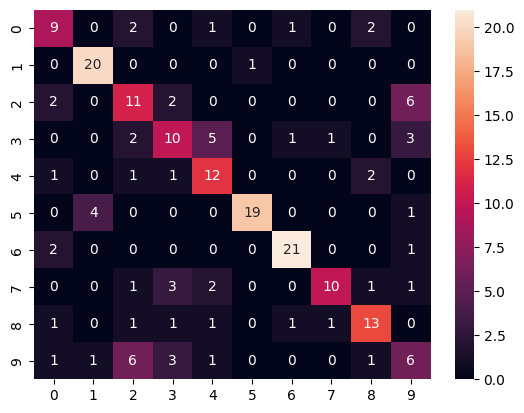

In [80]:
sns.heatmap(confusion_matrix(y_test_true, y_test_pred), annot = True)

In [81]:
con_max_train = confusion_matrix(y_train_true, y_train_pred)
count = 0
for i in range(len(con_max_train)):
      count += con_max_train[i][i]
count/len(x_train)

0.9275

In [82]:
con_max_test = confusion_matrix(y_test_true, y_test_pred)
count = 0
for i in range(len(con_max_test)):
      count += con_max_test[i][i]
count/len(x_test)

0.655